1. 자전거의 평균 운행속도가 높은 경우 자전거에 부하가 많이 걸려서 고장확률이 높을 것이다.
2. 자전거의 평균 운행속도가 높게 운행된 자전거들의 고장 부위는 특정될 것이다.
(or 평균 운행속도가 높을수록 고장률이 높을 것이다.)

In [2]:
# 라이브러리 임포트
import os
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 사용
font_prop = fm.FontProperties(fname=font_path)

# matplotlib 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

---
## 고장 신고 데이터

In [5]:
file_path_faults = r'G:\내 드라이브\DataSet\_최종 병합 파일\서울시 공공자전거 고장신고 내역_15-24.06.parquet'
data_faults = pd.read_parquet(file_path_faults)

In [6]:
data_faults.shape[0]

767715

In [7]:
data_faults.head(2)

,자전거번호,고장구분,등록일자,등록시간
0,SPB-00108,체인,2015-12-04,07:41:01
1,SPB-00210,체인,2015-12-07,12:23:33


In [8]:
# 등록일자에서 년/월/일 추출하여 새로운 열 생성
data_faults['년'] = data_faults['등록일자'].astype(str).str[0:4]
data_faults['월'] = data_faults['등록일자'].astype(str).str[5:7]
data_faults['일'] = data_faults['등록일자'].astype(str).str[8:10]

In [9]:
data_faults.head(3)

,자전거번호,고장구분,등록일자,등록시간,년,월,일
0,SPB-00108,체인,2015-12-04,07:41:01,2015,12,04
1,SPB-00210,체인,2015-12-07,12:23:33,2015,12,07
2,SPB-00035,기타,2015-12-09,17:07:00,2015,12,09


In [10]:
data_faults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767715 entries, 0 to 767714
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   자전거번호   767715 non-null  string
 1   고장구분    767715 non-null  string
 2   등록일자    767715 non-null  string
 3   등록시간    618185 non-null  string
 4   년       767715 non-null  object
 5   월       767715 non-null  object
 6   일       767715 non-null  object
dtypes: object(3), string(4)
memory usage: 41.0+ MB


### 고장내역 2020 ~ 2024만 가져오기

In [12]:
data_faults = data_faults[data_faults['년'].between('2020', '2024')]

In [13]:
data_faults.shape[0]

649426

### 결측치 확인 (고장내역)

<Axes: >

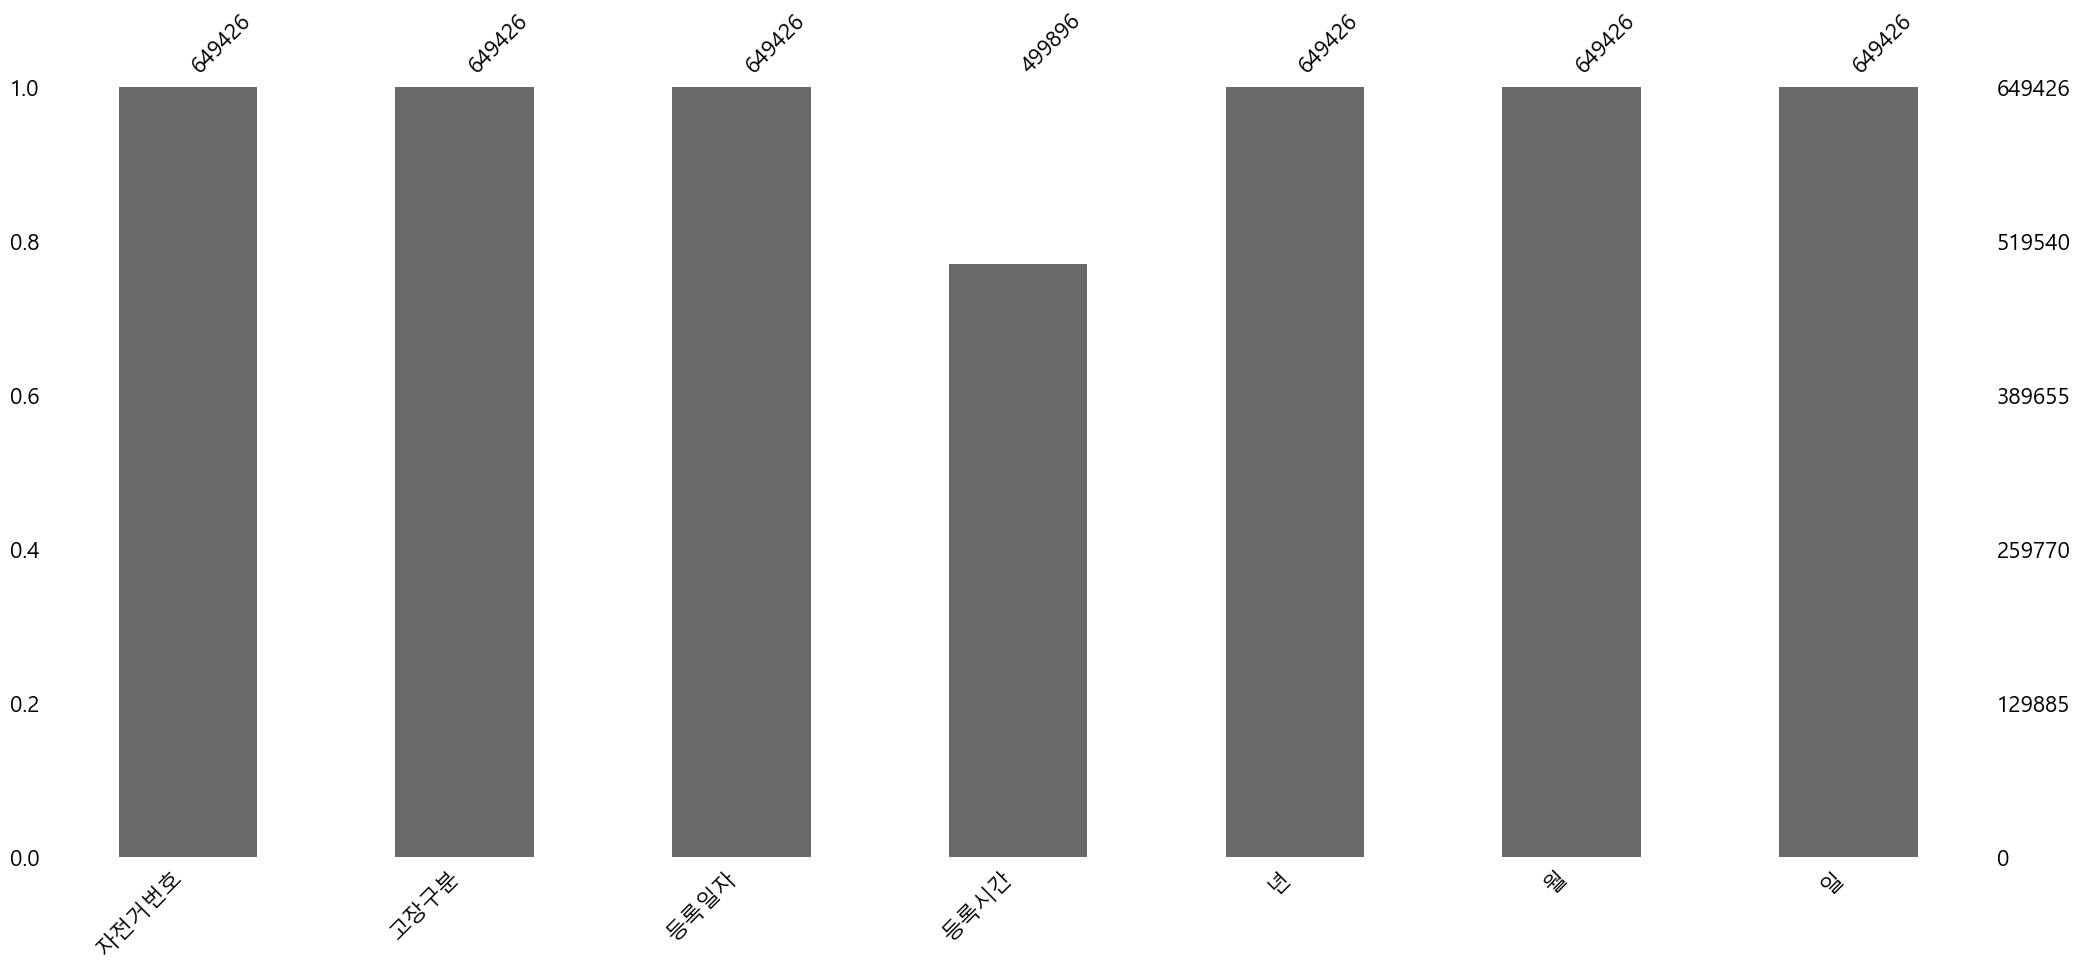

In [15]:
import missingno as msno
#msno.matrix(data_faults)
msno.bar(data_faults)
#msno.heatmap(data_faults)
#msno.dendrogram(data_faults)

In [16]:
data_faults.head(3)

,자전거번호,고장구분,등록일자,등록시간,년,월,일
118289,SPB-22497,타이어,2020-01-01,00:05:59,2020,01,01
118290,SPB-22497,체인,2020-01-01,00:05:59,2020,01,01
118291,SPB-21107,단말기,2020-01-01,00:08:22,2020,01,01


### 고장구분 별 비율

In [18]:
gb_percentage = data_faults['고장구분'].value_counts(normalize=True)
print(gb_percentage.sort_index(ascending=True))

고장구분
기타      0.285688
단말기     0.068453
안장      0.176294
체인       0.19915
타이어     0.175754
페달      0.094662
Name: proportion, dtype: Float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

---
### 고장구분 별 고장 비율

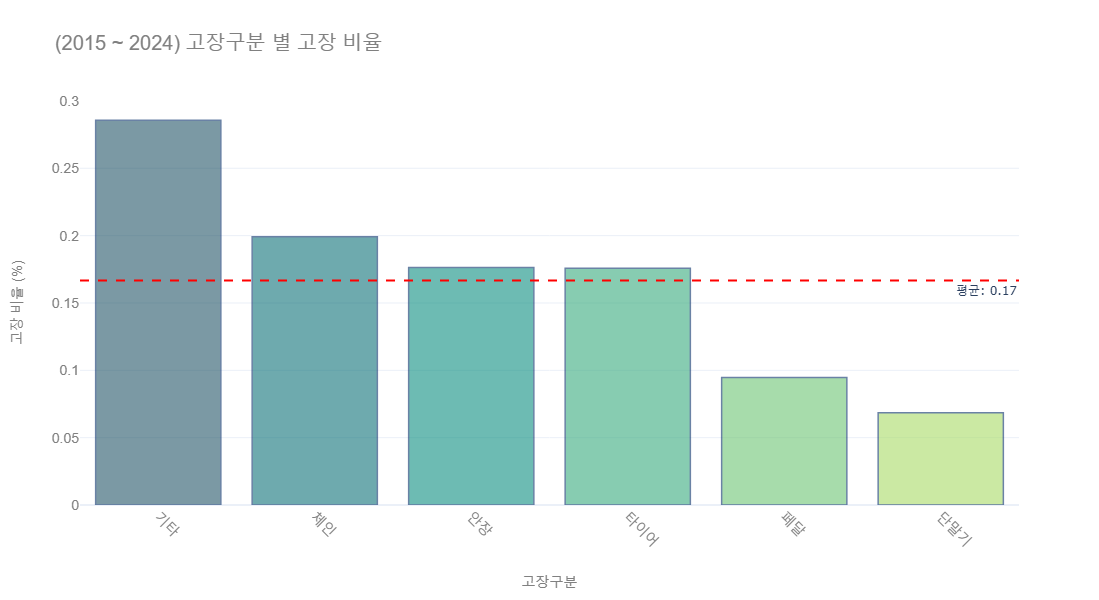

In [324]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 색상 그라데이션 생성
colors = px.colors.sequential.Aggrnyl

# Assuming gb_percentage is your pandas Series or DataFrame
sorted_data = gb_percentage.sort_values(ascending=False)

# Create the figure with subplots
fig = make_subplots(rows=1, cols=1, subplot_titles=[''])

# Add the bar chart
fig.add_trace(
    go.Bar(
        x=sorted_data.index,
        y=sorted_data.values,
        
        marker_color=colors,
        
        marker_line_color='rgb(8,48,107)',
        marker_line_width=1.5,
        opacity=0.6
    ),
    row=1, col=1
)

# Update layout for better visualization
fig.update_layout(
    title_text='(2015 ~ 2024) 고장구분 별 고장 비율',
    title=dict(
        font=dict(size=20, family='Arial', color='gray'),
    ),
    showlegend=False,
    height=600,
    width=600,
    template='plotly_white'
)

# Update x-axis
fig.update_xaxes(
    title_text='고장구분',
    tickangle=45,
    row=1, col=1,
    title=dict(
        font=dict(size=14, family='Arial', color='gray'),
        standoff=25  # 축과 제목 사이의 거리
    ),
)

# Update y-axis
fig.update_yaxes(
    title_text='고장 비율 (%)',
    title=dict(
        font=dict(size=14, family='Arial', color='gray'),
        standoff=25  # 축과 제목 사이의 거리
    ),
    row=1, col=1,
)


# 평균선 추가
mean_value = sorted_data.mean()
fig.add_hline(y=mean_value, line_dash="dash", line_color="red",
              annotation_text=f"평균: {mean_value:.2f}", 
              annotation_position="bottom right")

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # Y축 눈금 글씨 크기 설정

# Show the plot
fig.show()

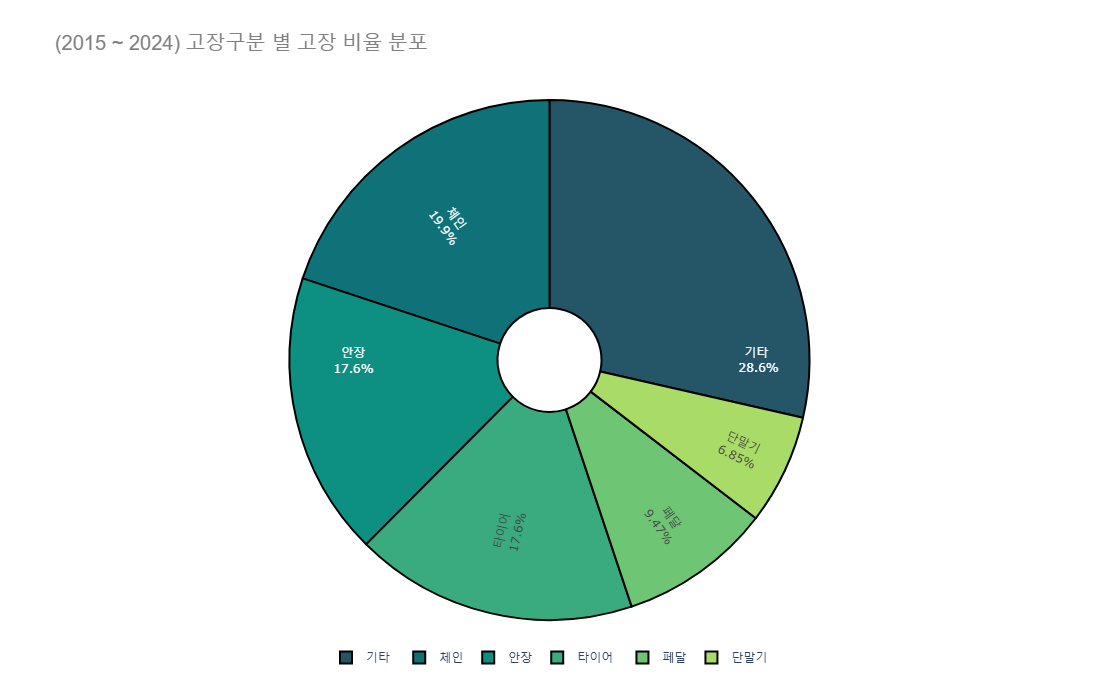

In [356]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 색상 그라데이션 생성
colors = px.colors.sequential.Aggrnyl

# gb_percentage가 pandas Series 또는 DataFrame이라고 가정합니다
sorted_data = gb_percentage.sort_values(ascending=False)

# 서브플롯이 있는 figure 생성
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

# 파이 차트 추가
fig.add_trace(go.Pie(
    labels=sorted_data.index,
    values=sorted_data.values,
    textinfo='label+percent',
    insidetextorientation='radial',
    textposition='inside',
    hole=.2,
    marker=dict(
        #colors=px.colors.qualitative.Pastel,
        colors=colors,
        line=dict(color='#000000', width=2)
    ),
), 1, 1)

# 레이아웃 업데이트
fig.update_layout(
    title_text='(2015 ~ 2024) 고장구분 별 고장 비율 분포',
    annotations=[dict(text='', x=0.82, y=0.5, font_size=20, showarrow=False)],
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    title=dict(
        font=dict(size=20, family='Arial', color='gray'),
    ),
    height=700,
    width=700,
    template='plotly_white'
)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # Y축 눈금 글씨 크기 설정

# 차트 표시
fig.show()

---
### 년/월/일 별 고장비율

#### 년별 고장비율

In [25]:
yearly_percentage = data_faults['년'].value_counts(normalize=True) * 100
print(yearly_percentage.sort_index(ascending=True))

년
2020    10.569795
2021    23.241755
2022    27.789463
2023    26.625050
2024    11.773936
Name: proportion, dtype: float64


#### 월별 고장비율

In [27]:
month_percentage = data_faults['월'].value_counts(normalize=True) * 100
month_percentage = month_percentage.sort_index(ascending=True)
print(month_percentage)

월
01     4.079911
02     3.707582
03     7.404847
04    11.333855
05    12.279459
06    12.049256
07     8.951289
08     8.709845
09    10.140801
10    10.219178
11     6.744417
12     4.379560
Name: proportion, dtype: float64


#### 일별 고장비율

In [29]:
day_percentage = data_faults['일'].value_counts(normalize=True) * 100
day_percentage = day_percentage.sort_index(ascending=True)
print(day_percentage)

일
01    3.375904
02    3.470911
03    3.252719
04    3.140004
05    3.138618
06    3.091037
07    3.271966
08    3.274430
09    3.145547
10    3.120910
11    3.320625
12    3.354193
13    3.334637
14    3.592711
15    3.093039
16    3.494932
17    3.556371
18    3.433186
19    3.365126
20    3.335253
21    3.261034
22    3.370361
23    3.149705
24    3.447044
25    3.330634
26    3.297065
27    3.380832
28    3.187738
29    2.792620
30    2.786461
31    1.834389
Name: proportion, dtype: float64


In [144]:
yearly_sum = data_faults['년'].value_counts()

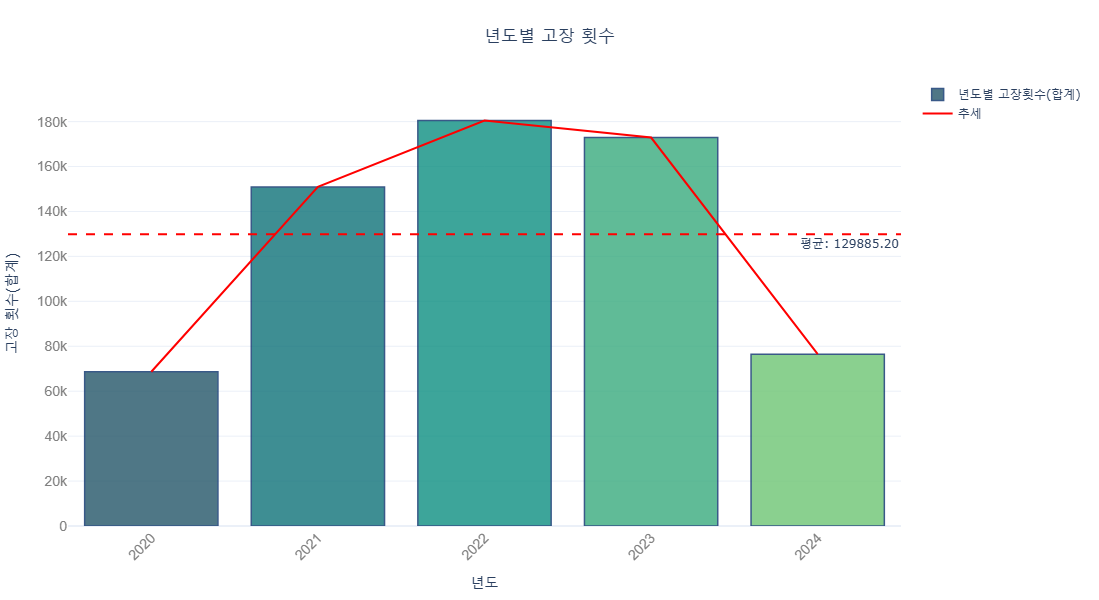

In [348]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# yearly_percentage가 pandas Series 또는 DataFrame이라고 가정합니다
sorted_data = yearly_sum.sort_index(ascending=True)

# 색상 그라데이션 생성
# colors = px.colors.sequential.Mint
colors = px.colors.sequential.Aggrnyl

# 그래프 생성
fig = go.Figure()

# 막대 그래프 추가
fig.add_trace(go.Bar(
    x=sorted_data.index,
    y=sorted_data.values,
    
    # marker_color='rgb(55, 83, 109)',
    marker_color=colors,
    
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5,
    opacity=0.8,
    name='년도별 고장횟수(합계)',
))

# 레이아웃 업데이트
fig.update_layout(
    title={
        'text': '년도별 고장 횟수',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    
    xaxis_title='년도',
    yaxis_title='고장 횟수(합계)',
    xaxis_tickangle=-45,
    bargap=0.2,
    template='plotly_white',
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=80, b=50)
)

# 연도별 추세선 추가
fig.add_trace(go.Scatter(
    x=sorted_data.index,
    y=sorted_data.values,
    mode='lines',
    name='추세',
    line=dict(color='red', width=2)
))

# y축 범위 설정 (0부터 시작)
fig.update_yaxes(range=[0, max(sorted_data.values) * 1.1])

# 호버 정보 커스터마이징
fig.update_traces(
    hovertemplate="<b>%{x}년</b><br>고장 비율: %{y:.2f}%<extra></extra>"
)

# 평균선 추가
mean_value = sorted_data.mean()
fig.add_hline(y=mean_value, line_dash="dash", line_color="red",
              annotation_text=f"평균: {mean_value:.2f}", 
              annotation_position="bottom right")


# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # Y축 눈금 글씨 크기 설정

# 차트 표시
fig.show()

# fig.write_html("년도별 고장 횟수.html")
# import webbrowser
# webbrowser.open("년도별 고장 횟수.html")

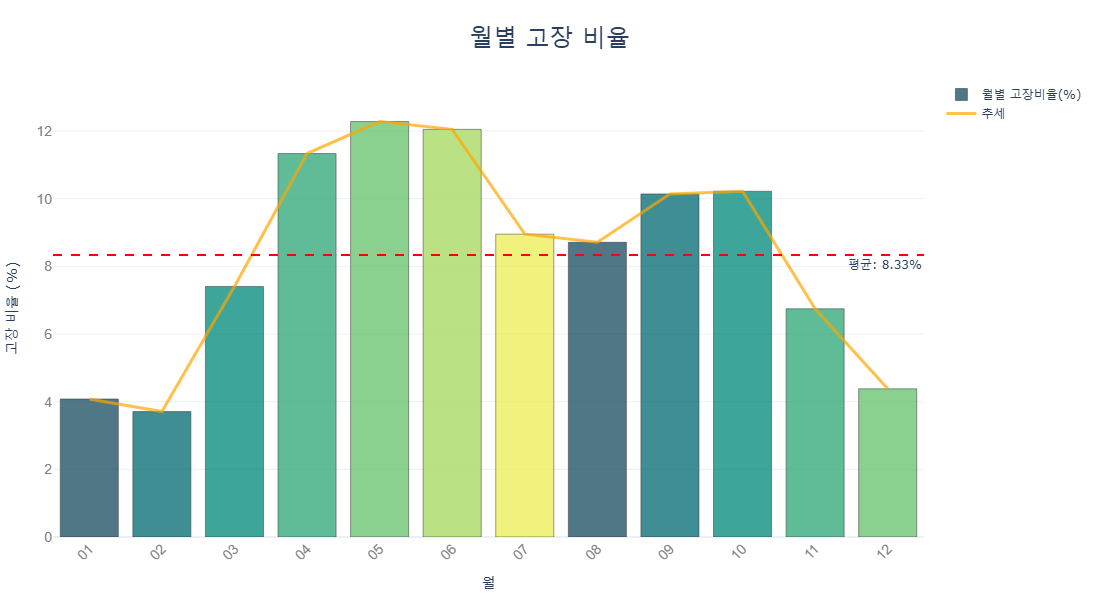

In [350]:
import plotly.graph_objects as go
import plotly.express as px

# month_percentage가 pandas Series 또는 DataFrame이라고 가정합니다
sorted_data = month_percentage.sort_index(ascending=True)

# 색상 그라데이션 생성
# colors = px.colors.sequential.Viridis*2
colors = px.colors.sequential.Aggrnyl*2

# 그래프 생성
fig = go.Figure()

# 막대 그래프 추가
fig.add_trace(go.Bar(
    x=sorted_data.index,
    y=sorted_data.values,
    marker_color=colors,
    marker_line_color='rgba(0,0,0,0.5)',
    marker_line_width=1,
    opacity=0.8,
    name='월별 고장비율(%)'
))

# 레이아웃 업데이트
fig.update_layout(
    title={
        'text': '월별 고장 비율',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    xaxis_title='월',
    yaxis_title='고장 비율 (%)',
    xaxis_tickangle=-45,
    bargap=0.2,
    template='plotly_white',
    height=600,
    width=1000,
    margin=dict(l=50, r=50, t=80, b=50)
)

# y축 범위 설정 (0부터 시작)
fig.update_yaxes(range=[0, max(sorted_data.values) * 1.1])

# 호버 정보 커스터마이징
fig.update_traces(
    hovertemplate="<b>%{x}월</b><br>고장 비율: %{y:.2f}%<extra></extra>"
)

# 평균선 추가
mean_value = sorted_data.mean()
fig.add_hline(y=mean_value, line_dash="dash", line_color="red",
              annotation_text=f"평균: {mean_value:.2f}%", 
              annotation_position="bottom right")

# 추세선 추가
x = list(range(len(sorted_data)))
y = sorted_data.values
fig.add_trace(go.Scatter(x=sorted_data.index, y=y, mode='lines', name='추세',
                         line=dict(color='rgba(255,165,0,0.7)', width=3)))

# x축 레이블 설정
fig.update_xaxes(tickmode='array', tickvals=sorted_data.index, ticktext=sorted_data.index)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # Y축 눈금 글씨 크기 설정

# 차트 표시
fig.show()

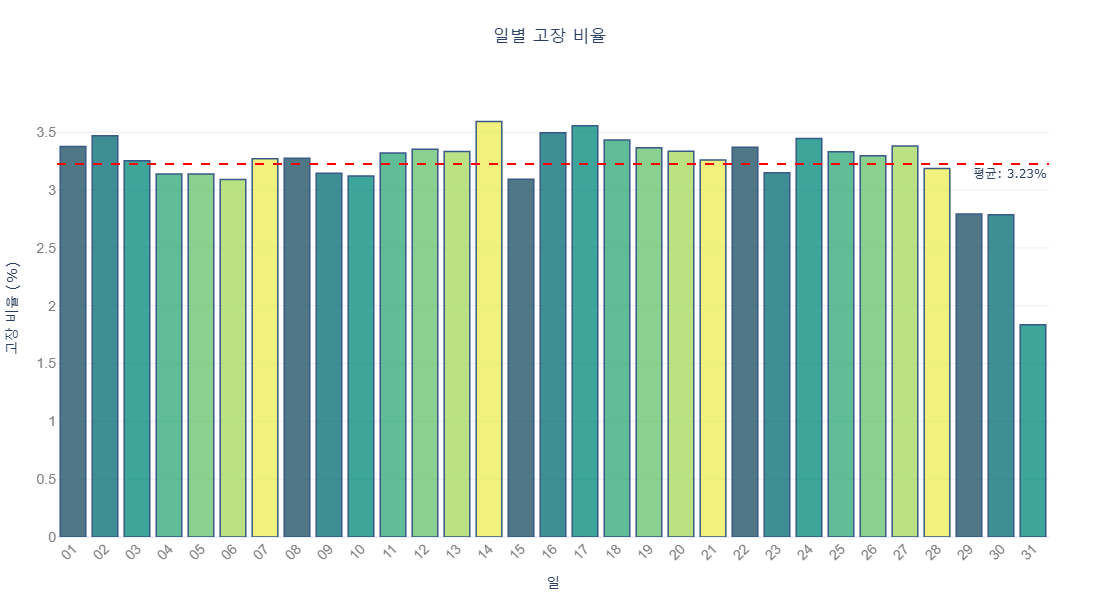

In [304]:
import plotly.graph_objects as go
import plotly.express as px

# day_percentage가 pandas Series 또는 DataFrame이라고 가정합니다
sorted_data = day_percentage.sort_index(ascending=True)

# 색상 그라데이션 생성
# colors = px.colors.sequential.Blues * 4#[::-1]  # 파란색 계열 그라데이션
colors = px.colors.sequential.Aggrnyl*5

# 그래프 생성
fig = go.Figure()

# 막대 그래프 추가
fig.add_trace(go.Bar(
    x=sorted_data.index,
    y=sorted_data.values,
    marker_color=colors,
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5,
    opacity=0.8
))

# 레이아웃 업데이트
fig.update_layout(
    title={
        'text': '일별 고장 비율',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='일',
    yaxis_title='고장 비율 (%)',
    xaxis_tickangle=-45,
    bargap=0.2,
    template='plotly_white',
    height=600,
    width=1000,
    margin=dict(l=50, r=50, t=80, b=50)
)

# y축 범위 설정 (0부터 시작)
fig.update_yaxes(range=[0, max(sorted_data.values) * 1.1])

# 호버 정보 커스터마이징
fig.update_traces(
    hovertemplate="<b>%{x}일</b><br>고장 비율: %{y:.2f}%<extra></extra>"
)

# 평균선 추가
mean_value = sorted_data.mean()
fig.add_hline(y=mean_value, line_dash="dash", line_color="red",
              annotation_text=f"평균: {mean_value:.2f}%", 
              annotation_position="bottom right")

# x축 레이블 조정 (5일 간격으로 표시)
fig.update_xaxes(tickmode='linear', tick0=1, dtick=1)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=14, family='Arial', color='gray'))  # Y축 눈금 글씨 크기 설정

# 차트 표시
fig.show()

In [32]:
data_faults_vc = data_faults['자전거번호'].value_counts().reset_index()
data_faults_vc = data_faults_vc.groupby('count').count().reset_index()
data_faults_vc.columns = ['신고횟수', '신고횟수_합계']
data_faults_vc

,신고횟수,신고횟수_합계
0,1,5893
1,2,4686
2,3,3698
3,4,2929
4,5,2361
...,...,...
74,80,1
75,82,1
76,86,1
77,94,1


In [33]:
data_faults_vc.describe()

,신고횟수,신고횟수_합계
count,79.0,79.000000
mean,41.050633,719.240506
std,24.737545,1150.677395
min,1.0,1.000000
25%,20.5,3.500000
50%,40.0,61.000000
75%,59.5,1257.500000
max,99.0,5893.000000


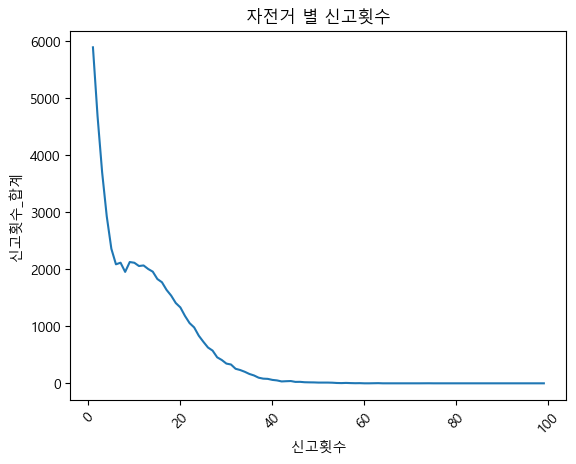

In [34]:
import seaborn as sns

sns.lineplot(x=data_faults_vc.신고횟수, y=data_faults_vc.신고횟수_합계)
plt.title('자전거 별 신고횟수')
plt.xlabel('신고횟수')
plt.ylabel('신고횟수_합계')
plt.xticks(rotation=45)
plt.show()